In [1]:
from google.colab import files
uploaded = files.upload()

Saving dataset_nlp.zip to dataset_nlp.zip


In [2]:
import zipfile

zip_path = "dataset_nlp.zip"   # name of the file
extract_path = "dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Zip başarıyla açıldı!")

Zip başarıyla açıldı!


In [3]:
import os
print(os.listdir("dataset"))

['30Columnists']


In [4]:
import os
import pandas as pd

data = []

base_path = "dataset/30Columnists/raw_texts"

# klasör isimleri yazar numarasını temsil ediyor
for author in sorted(os.listdir(base_path), key=lambda x: int(x)):
    author_path = os.path.join(base_path, author)

    if os.path.isdir(author_path):
        for filename in os.listdir(author_path):
            if filename.endswith(".txt"):
                file_path = os.path.join(author_path, filename)

                with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
                    text = f.read()

                # author'ı integer yapıyoruz
                data.append([int(author), text])

df = pd.DataFrame(data, columns=["author", "text"])
df.head()


,author,text
0,1,IT was this time last year in the run up to th...
1,1,RONNIE REAGAN had it. Tony Blair had it. Now i...
2,1,HOW was it for you? Have you already had the R...
3,1,IT'S that time of year again when the Scottish...
4,1,HIS name was Andrew J Volstead and he was to b...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   author  1500 non-null   int64 
 1   text    1500 non-null   object
dtypes: int64(1), object(1)
memory usage: 23.6+ KB


In [6]:
len(df)

1500

In [8]:
df['author'].nunique()

30

In [9]:
df['author'].value_counts()

,count
author,
1,50
2,50
3,50
4,50
5,50
6,50
7,50
8,50
9,50


In [10]:
import re
import string
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuations
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])  # remove stopwords
    return text

In [12]:
df['cleaned_text'] = df['text'].apply(clean_text)

df[['text', 'cleaned_text']].head()

,text,cleaned_text
0,IT was this time last year in the run up to th...,time last year run labour party conference sen...
1,RONNIE REAGAN had it. Tony Blair had it. Now i...,ronnie reagan tony blair seems first minister ...
2,HOW was it for you? Have you already had the R...,already rennies resolve ibuprofen cocktail pic...
3,IT'S that time of year again when the Scottish...,time year scottish government announced intend...
4,HIS name was Andrew J Volstead and he was to b...,name andrew j volstead become one influential ...


PART B

1. Author Distribution:
author
1     50
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
11    50
12    50
13    50
14    50
15    50
16    50
17    50
18    50
19    50
20    50
21    50
22    50
23    50
24    50
25    50
26    50
27    50
28    50
29    50
30    50
Name: count, dtype: int64


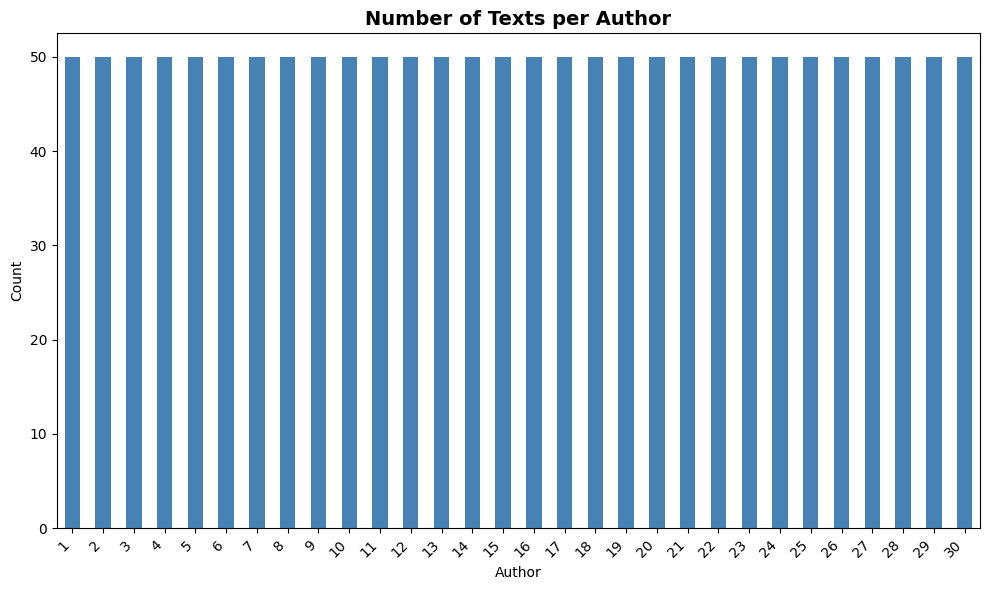

In [13]:
import matplotlib.pyplot as plt
print("=" * 60)
print("PART B")
print("=" * 60)

print("\n1. Author Distribution:")
author_counts = df['author'].value_counts()
print(author_counts)

# Visualize author distribution
plt.figure(figsize=(10, 6))
df['author'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Number of Texts per Author', fontsize=14, fontweight='bold')
plt.xlabel('Author')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


# TF-IDF Feature Extraction
# ============================================

print("\n Extracting TF-IDF Features")

X = df['cleaned_text']
y = df['author']

# Split data first (80-20 train-test split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

print("\nClass distribution in training set:")
print(y_train.value_counts())
print("\nClass distribution in test set:")
print(y_test.value_counts())


# PARAMETER TUNING SECTION
# ============================================

print("\n" + "=" * 60)
print("OPTIMIZED TF-IDF PARAMETERS FOR BALANCED DATASET")
print("=" * 60)
print("\nDataset Info: 30 authors × 50 texts = 1500 total texts")
print("This is a balanced dataset - all authors equally represented\n")


tfidf_word_params = {
    'max_features': 6000,
    'ngram_range': (1, 2),    # Captures both words and common phrases
    'min_df': 3,              # With 50 texts/author, terms in 3+ docs are meaningful
    'max_df': 0.75,            # Filter very common words that don't distinguish authors
    'sublinear_tf': True,     # Reduces impact of very frequent terms
    'strip_accents': 'unicode'
}

tfidf_char_params = {
    'analyzer': 'char',
    'ngram_range': (3, 5),
    'max_features': 8000,
    'min_df': 3,              # With 50 texts/author, terms in 3+ docs are meaningful
    'sublinear_tf': True      # Reduces impact of very frequent terms
}


print("Word-level TF-IDF Parameters:")
for key, value in tfidf_word_params.items():
    print(f"  {key}: {value}")

print("\nCharacter-level TF-IDF Parameters:")
for key, value in tfidf_char_params.items():
    print(f"  {key}: {value}")


# TF-IDF Vectorizer with word n-grams
tfidf_word = TfidfVectorizer(**tfidf_word_params)

# Fit and transform training data
X_train_tfidf_word = tfidf_word.fit_transform(X_train)
X_test_tfidf_word = tfidf_word.transform(X_test)

print(f"\nWord TF-IDF feature matrix shape: {X_train_tfidf_word.shape}")

# TF-IDF with character n-grams (useful for capturing author style)
tfidf_char = TfidfVectorizer(**tfidf_char_params)

X_train_tfidf_char = tfidf_char.fit_transform(X_train)
X_test_tfidf_char = tfidf_char.transform(X_test)

print(f"Character TF-IDF feature matrix shape: {X_train_tfidf_char.shape}")


# Combined Features (Word + Char)


print("\n" + "=" * 60)
print("CREATING COMBINED FEATURES")
print("=" * 60)

from scipy.sparse import hstack

X_train_combined = hstack([X_train_tfidf_word, X_train_tfidf_char])       # # Combine word and character features
X_test_combined = hstack([X_test_tfidf_word, X_test_tfidf_char])

print(f"\nCombined feature matrix shape: {X_train_combined.shape}")
print(f"  Word features: {X_train_tfidf_word.shape[1]}")
print(f"  Char features: {X_train_tfidf_char.shape[1]}")
print(f"  Total: {X_train_combined.shape[1]}")
print("\nThis combines lexical (word) and stylistic (character) patterns")


 Extracting TF-IDF Features

Training set size: 1200
Test set size: 300

Class distribution in training set:
author
23    40
11    40
2     40
9     40
5     40
7     40
24    40
10    40
1     40
6     40
14    40
19    40
27    40
20    40
21    40
28    40
17    40
30    40
22    40
18    40
25    40
15    40
16    40
13    40
4     40
26    40
29    40
8     40
12    40
3     40
Name: count, dtype: int64

Class distribution in test set:
author
6     10
13    10
24    10
26    10
11    10
7     10
2     10
25    10
5     10
21    10
17    10
19    10
10    10
20    10
27    10
3     10
8     10
18    10
1     10
16    10
28    10
14    10
4     10
15    10
9     10
23    10
12    10
29    10
30    10
22    10
Name: count, dtype: int64

OPTIMIZED TF-IDF PARAMETERS FOR BALANCED DATASET

Dataset Info: 30 authors × 50 texts = 1500 total texts
This is a balanced dataset - all authors equally represented

Word-level TF-IDF Parameters:
  max_features: 6000
  ngram_range: (1, 2)
  min_df: 

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Word n-gram TF-IDF
word_vectorizer = TfidfVectorizer(
    analyzer='word',
    ngram_range=(1,2),  # 1-gram ve 2-gram
    max_features=5000   # en sık geçen 5000 özellik
)

X_word = word_vectorizer.fit_transform(df['cleaned_text'])

print("Word n-gram TF-IDF shape:", X_word.shape)


# Character n-gram TF-IDF
char_vectorizer = TfidfVectorizer(
    analyzer='char',
    ngram_range=(3,5),  # 3-5 karakter uzunluğunda n-gram
    max_features=5000
)

X_char = char_vectorizer.fit_transform(df['cleaned_text'])

print("Character n-gram TF-IDF shape:", X_char.shape)


from scipy.sparse import hstack

X_combined = hstack([X_word, X_char])
print("Combined TF-IDF shape:", X_combined.shape)


Word n-gram TF-IDF shape: (1500, 5000)
Character n-gram TF-IDF shape: (1500, 5000)
Combined TF-IDF shape: (1500, 10000)


In [16]:
from sklearn.model_selection import train_test_split

X = X_combined  # word + character n-gram birleştirilmiş matris
y = df['author']

# %80 train, %20 test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set:", X_train.shape, "Test set:", X_test.shape)

Train set: (1200, 10000) Test set: (300, 10000)



PART C - MODELING

1. Logistic Regression with Word TF-IDF
Accuracy: 0.8867
F1-Score: 0.8865

2. Logistic Regression with Character TF-IDF
Accuracy: 0.8600
F1-Score: 0.8565

3. Multinomial Naive Bayes
Accuracy: 0.9067
F1-Score: 0.9064

4. Random Forest
Accuracy: 0.8100
F1-Score: 0.8082

5. Logistic Regression with Combined Features
Accuracy: 0.9100
F1-Score: 0.9111

MODEL COMPARISON

        Model  Accuracy  F1-Score
 LR_Combined  0.910000  0.911125
  NaiveBayes  0.906667  0.906422
     LR_Word  0.886667  0.886474
     LR_Char  0.860000  0.856505
RandomForest  0.810000  0.808151


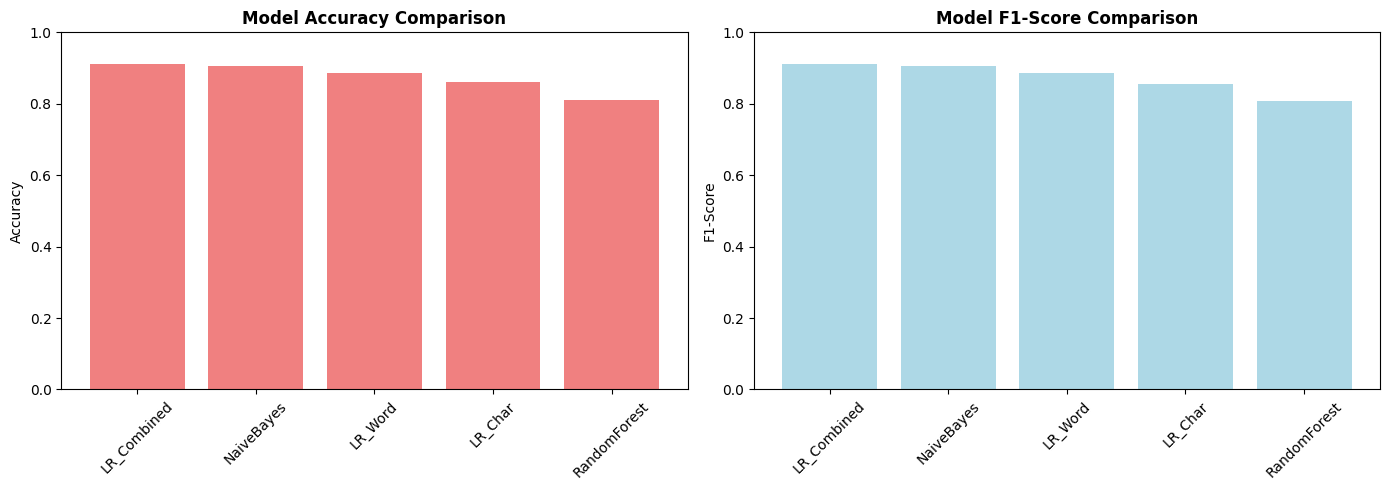


BEST MODEL: LR_Combined

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.80      0.89        10
           2       0.89      0.80      0.84        10
           3       0.75      0.90      0.82        10
           4       0.89      0.80      0.84        10
           5       0.71      1.00      0.83        10
           6       1.00      1.00      1.00        10
           7       1.00      0.80      0.89        10
           8       1.00      0.70      0.82        10
           9       0.78      0.70      0.74        10
          10       1.00      0.90      0.95        10
          11       0.73      0.80      0.76        10
          12       1.00      0.90      0.95        10
          13       1.00      0.90      0.95        10
          14       1.00      0.90      0.95        10
          15       0.91      1.00      0.95        10
          16       1.00      0.90      0.95        10
          17       1.00      1.0

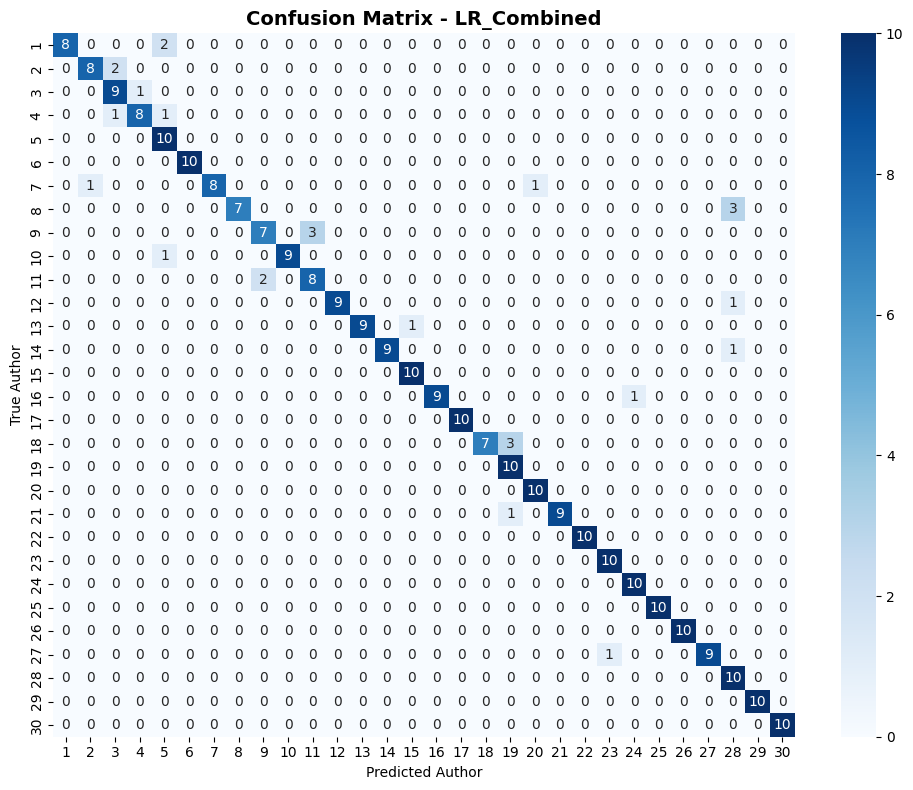


TOP INDICATIVE FEATURES PER AUTHOR

1:
  • burgh: 0.5987
  • urgh: 0.5987
  • inb: 0.5968
  •  edi: 0.5948
  • rgh: 0.5923
  • edin: 0.5661
  • burg: 0.5349
  •  scot: 0.4872
  • scot: 0.4848
  • cot: 0.4666

2:
  •  snp: 0.9499
  • snp: 0.9466
  •  snp : 0.8988
  • snp : 0.8959
  • np : 0.8502
  •  ms: 0.7919
  • ttish: 0.7198
  • ottis: 0.7198
  • cotti: 0.7197
  • ttis: 0.7162

3:
  • scot: 0.8862
  •  scot: 0.8674
  • cot: 0.8506
  •  sco: 0.6503
  • cotl: 0.6456
  • cotla: 0.6456
  • otla: 0.6435
  • otlan: 0.6435
  • scotl: 0.6429
  • otl: 0.6299

4:
  •  scot: 0.7332
  • scot: 0.7161
  • cot: 0.6784
  • scotl: 0.6027
  • cotla: 0.6024
  • cotl: 0.6024
  • otla: 0.6005
  • otlan: 0.6005
  • ottis: 0.5946
  • ttish: 0.5946

5:
  • obam: 0.9546
  • obama: 0.9525
  • bama: 0.9522
  •  obam: 0.9506
  •  oba: 0.9474
  • bam: 0.9439
  • bama : 0.9110
  • presi: 0.8462
  • siden: 0.8222
  • ama : 0.8067

6:
  •  mr : 0.7752
  • mr : 0.7600
  •  mr: 0.7104
  •  mr b: 0.6360
  • blic : 0

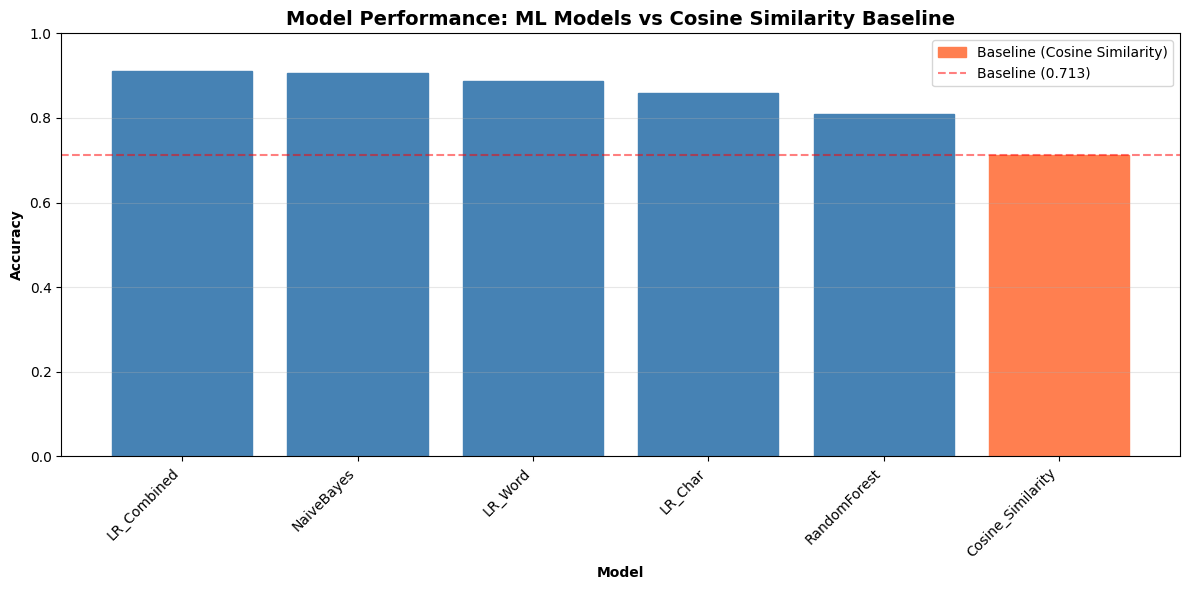


BASELINE COMPARISON ANALYSIS

Baseline (Cosine Similarity): 0.7133
Best ML Model: 0.9100
Improvement: 27.57%

✓ ML models outperform the baseline by 27.57%
✓ This shows that supervised learning captures author patterns better
  than simple similarity matching.

PROJECT COMPLETE WITH BASELINE COMPARISON


In [19]:
# PART C - MODELING
# ============================================

print("\n" + "=" * 60)
print("PART C - MODELING")
print("=" * 60)

results = {}

# Model 1: Logistic Regression (Word TF-IDF)
# ============================================

print("\n1. Logistic Regression with Word TF-IDF")

lr_word = LogisticRegression(
    max_iter=1000,
    random_state=42,
    C=1.0,           # Regularization strength
    solver='lbfgs',  # Good for multi-class problems
    multi_class='multinomial'  # Better for 30 classes
)
lr_word.fit(X_train_tfidf_word, y_train)

y_pred_lr_word = lr_word.predict(X_test_tfidf_word)
acc_lr_word = accuracy_score(y_test, y_pred_lr_word)
f1_lr_word = f1_score(y_test, y_pred_lr_word, average='weighted')

results['LR_Word'] = {
    'accuracy': acc_lr_word,
    'f1_score': f1_lr_word,
    'predictions': y_pred_lr_word
}

print(f"Accuracy: {acc_lr_word:.4f}")
print(f"F1-Score: {f1_lr_word:.4f}")

# Model 2: Logistic Regression (Character TF-IDF)
# ============================================

print("\n2. Logistic Regression with Character TF-IDF")
lr_char = LogisticRegression(
    max_iter=2000,
    random_state=42,
    C=1.0,
    solver='lbfgs',
    multi_class='multinomial',
    class_weight='balanced'
)
lr_char.fit(X_train_tfidf_char, y_train)

y_pred_lr_char = lr_char.predict(X_test_tfidf_char)
acc_lr_char = accuracy_score(y_test, y_pred_lr_char)
f1_lr_char = f1_score(y_test, y_pred_lr_char, average='weighted')

results['LR_Char'] = {
    'accuracy': acc_lr_char,
    'f1_score': f1_lr_char,
    'predictions': y_pred_lr_char
}

print(f"Accuracy: {acc_lr_char:.4f}")
print(f"F1-Score: {f1_lr_char:.4f}")


# Model 3: Multinomial Naive Bayes
# ============================================

print("\n3. Multinomial Naive Bayes")
nb = MultinomialNB(alpha=0.1)
nb.fit(X_train_tfidf_word, y_train)

y_pred_nb = nb.predict(X_test_tfidf_word)
acc_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

results['NaiveBayes'] = {
    'accuracy': acc_nb,
    'f1_score': f1_nb,
    'predictions': y_pred_nb
}

print(f"Accuracy: {acc_nb:.4f}")
print(f"F1-Score: {f1_nb:.4f}")


# Model 4: Random Forest
# ============================================

print("\n4. Random Forest")
rf = RandomForestClassifier(
    n_estimators=200,       # More trees for 30 classes
    random_state=42,
    max_depth=25,           # Deeper trees for complex patterns
    min_samples_split=5,    # Prevent overfitting
    min_samples_leaf=2,
    n_jobs=-1               # Use all CPU cores
)
rf.fit(X_train_tfidf_word, y_train)

y_pred_rf = rf.predict(X_test_tfidf_word)
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

results['RandomForest'] = {
    'accuracy': acc_rf,
    'f1_score': f1_rf,
    'predictions': y_pred_rf
}

print(f"Accuracy: {acc_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")


# Model 5: Logistic Regression with Combined Features
# ============================================

print("\n5. Logistic Regression with Combined Features")
lr_combined = LogisticRegression(
    max_iter=1000,
    random_state=42,
    C=1.0,
    solver='lbfgs',
    multi_class='multinomial'
)
lr_combined.fit(X_train_combined, y_train)

y_pred_lr_combined = lr_combined.predict(X_test_combined)
acc_lr_combined = accuracy_score(y_test, y_pred_lr_combined)
f1_lr_combined = f1_score(y_test, y_pred_lr_combined, average='weighted')

results['LR_Combined'] = {
    'accuracy': acc_lr_combined,
    'f1_score': f1_lr_combined,
    'predictions': y_pred_lr_combined
}

print(f"Accuracy: {acc_lr_combined:.4f}")
print(f"F1-Score: {f1_lr_combined:.4f}")

# ============================================

print("\n" + "=" * 60)
print("MODEL COMPARISON")
print("=" * 60)

results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'F1-Score': [results[m]['f1_score'] for m in results.keys()]
})

results_df = results_df.sort_values('Accuracy', ascending=False)
print("\n", results_df.to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(results_df['Model'], results_df['Accuracy'], color='lightcoral')    # Accuracy comparison
axes[0].set_title('Model Accuracy Comparison', fontweight='bold')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0, 1])
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(results_df['Model'], results_df['F1-Score'], color='lightblue')     # F1 comparison
axes[1].set_title('Model F1-Score Comparison', fontweight='bold')
axes[1].set_ylabel('F1-Score')
axes[1].set_ylim([0, 1])
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


best_model_name = results_df.iloc[0]['Model']
best_predictions = results[best_model_name]['predictions']

print(f"\n" + "=" * 60)
print(f"BEST MODEL: {best_model_name}")
print("=" * 60)

print("\nClassification Report:")
print(classification_report(y_test, best_predictions))

# Check for bias - is model predicting one class too often?
from collections import Counter
pred_distribution = Counter(best_predictions)
print("\n" + "=" * 60)
print("PREDICTION DISTRIBUTION ANALYSIS")
print("=" * 60)
print("\nHow often does the model predict each author?")
for author, count in sorted(pred_distribution.items(), key=lambda x: x[1], reverse=True):
    percentage = (count / len(best_predictions)) * 100
    actual_count = sum(y_test == author)
    print(f"{author}:")
    print(f"  Predicted: {count} times ({percentage:.1f}%)")
    print(f"  Actual: {actual_count} times ({(actual_count/len(y_test))*100:.1f}%)")

    if percentage > 50:
        print(f"Model is over-predicting this author")

cm = confusion_matrix(y_test, best_predictions)    # # Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title(f'Confusion Matrix - {best_model_name}', fontweight='bold', fontsize=14)
plt.ylabel('True Author')
plt.xlabel('Predicted Author')
plt.tight_layout()
plt.show()


# ============================================
# FEATURE IMPORTANCE

if 'LR' in best_model_name:
    print("\n" + "=" * 60)
    print("TOP INDICATIVE FEATURES PER AUTHOR")
    print("=" * 60)

    if best_model_name == 'LR_Word':
        model = lr_word
        vectorizer = tfidf_word
    else:
        model = lr_char
        vectorizer = tfidf_char

    feature_names = vectorizer.get_feature_names_out()

    for idx, author in enumerate(model.classes_):    # # Get top features for each author
        print(f"\n{author}:")

        if len(model.classes_) == 2:
            coef = model.coef_[0] if idx == 0 else -model.coef_[0]
        else:
            coef = model.coef_[idx]

        top_indices = np.argsort(coef)[-10:][::-1]               #  # Get top 10 features
        top_features = [feature_names[i] for i in top_indices]
        top_values = [coef[i] for i in top_indices]

        for feature, value in zip(top_features, top_values):
            print(f"  • {feature}: {value:.4f}")

print("\n" + "=" * 60)
print("End of the Model Comparison")
print("=" * 60)

print("TESTING WITH NEW TEXTS")
print("=" * 60)

def predict_author(text, model, vectorizer, preprocessing_func=None):    # Predict the author of a given text.

    if preprocessing_func is not None:    # Preprocess
        cleaned_text = preprocessing_func(text)
    else:
        cleaned_text = text.lower().strip()

    text_vector = vectorizer.transform([cleaned_text])   # Vectorize

    predicted_label = model.predict(text_vector)[0]

    if hasattr(model, "predict_proba"):
        probabilities = model.predict_proba(text_vector)[0]
        prob_dict = {cls: prob for cls, prob in zip(model.classes_, probabilities)}
    else:
        prob_dict = None

    return predicted_label, prob_dict

print("\nUsing best model:", best_model_name)

if best_model_name == 'LR_Word':
    best_model = lr_word
    best_vectorizer = tfidf_word
elif best_model_name == 'LR_Char':
    best_model = lr_char
    best_vectorizer = tfidf_char
elif best_model_name == 'NaiveBayes':
    best_model = nb
    best_vectorizer = tfidf_word
else:  # RandomForest
    best_model = rf
    best_vectorizer = tfidf_word

# Test with example sentences
test_sentences = [
    "The government's economic policy will impact millions of citizens",
    "Honestly, I'm so done with this weather - can't wait for summer to finally arrive!",
    "The correlation coefficient of 0.87 suggests a strong positive relationship between the variables.",
    "This is an absolute disgrace and those responsible must be held accountable immediately!",
    "The ancient oak tree stood silent, its gnarled branches reaching toward the grey autumn sky.",
    "Have you ever wondered what drives people to make such irrational decisions under pressure?",
    "The meeting starts at three.",
    "Notwithstanding the aforementioned concerns regarding implementation timelines, stakeholders remain cautiously optimistic."
]

print("\n" + "-" * 60)
print("EXAMPLE PREDICTIONS:")
print("-" * 60)

for i, sentence in enumerate(test_sentences, 1):
    print(f"\n{i}. Input Text:")
    print(f"   \"{sentence[:80]}...\"" if len(sentence) > 80 else f"   \"{sentence}\"")

    predicted, probs = predict_author(sentence, best_model, best_vectorizer)

    print(f"\n   Predicted Author: {predicted}")

    if probs:
        print("\n   Prediction Confidence:")
        sorted_probs = sorted(probs.items(), key=lambda x: x[1], reverse=True)
        for author, prob in sorted_probs[:3]:  # Show top 3
            print(f"      {author}: {prob*100:.2f}%")


print("\n" + "=" * 60)
print("Type a sentence to predict the author.")
print("Type 'quit' to exit.\n")

while True:
    user_input = input("Enter your text: ").strip()

    if user_input.lower() == "quit":
        break

    if user_input == "":
        print("Please enter a non-empty sentence.\n")
        continue

    predicted_author, probabilities = predict_author(
        user_input,
        best_model,
        best_vectorizer
    )

    print("\nPredicted Author:", predicted_author)

    if probabilities:
        print("\nProbability distribution (Top 10):")
        sorted_probs = sorted(probabilities.items(), key=lambda x: x[1], reverse=True)

        for author, prob in sorted_probs[:10]:   # only top 10 for readability
            print(f"  Author {author}: {prob*100:.2f}%")

    print("\n" + "-" * 60 + "\n")

print("\n" + "=" * 60)


# COSINE SIMILARITY COMPARISON

print("\n" + "=" * 60)
print("COSINE SIMILARITY")
print("=" * 60)

from sklearn.metrics.pairwise import cosine_similarity

def predict_with_cosine_similarity(test_text, X_train_vectors, y_train_labels):

    similarities = cosine_similarity(test_text, X_train_vectors)
    most_similar_idx = similarities.argmax()
    return y_train_labels.iloc[most_similar_idx]

print("\nPredicting test set using Cosine Similarity")
y_pred_cosine = []

for test_vector in X_test_tfidf_word:
    pred = predict_with_cosine_similarity(test_vector, X_train_tfidf_word, y_train)
    y_pred_cosine.append(pred)

acc_cosine = accuracy_score(y_test, y_pred_cosine)
f1_cosine = f1_score(y_test, y_pred_cosine, average='weighted')

print(f"\nCosine Similarity Results:")
print(f"  Accuracy: {acc_cosine:.4f}")
print(f"  F1-Score: {f1_cosine:.4f}")

results['Cosine_Similarity'] = {
    'accuracy': acc_cosine,
    'f1_score': f1_cosine,
    'predictions': y_pred_cosine
}

print("\n" + "=" * 60)
print("UPDATED MODEL COMPARISON (WITH BASELINE)")
print("=" * 60)

results_df_updated = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'F1-Score': [results[m]['f1_score'] for m in results.keys()]
})

results_df_updated = results_df_updated.sort_values('Accuracy', ascending=False)
print("\n", results_df_updated.to_string(index=False))

fig, ax = plt.subplots(figsize=(12, 6))
x_pos = np.arange(len(results_df_updated))
bars = ax.bar(x_pos, results_df_updated['Accuracy'],
              color=['coral' if 'Cosine' in m else 'steelblue'
                     for m in results_df_updated['Model']])

for i, model in enumerate(results_df_updated['Model']):
    if 'Cosine' in model:
        bars[i].set_label('Baseline (Cosine Similarity)')
        bars[i].set_color('coral')
    else:
        bars[i].set_color('steelblue')

ax.set_xlabel('Model', fontweight='bold')
ax.set_ylabel('Accuracy', fontweight='bold')
ax.set_title('Model Performance: ML Models vs Cosine Similarity Baseline',
             fontweight='bold', fontsize=14)
ax.set_xticks(x_pos)
ax.set_xticklabels(results_df_updated['Model'], rotation=45, ha='right')
ax.set_ylim([0, 1])
ax.axhline(y=acc_cosine, color='red', linestyle='--', alpha=0.5,
           label=f'Baseline ({acc_cosine:.3f})')
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("BASELINE COMPARISON ANALYSIS")
print("=" * 60)

ml_models = [k for k in results.keys() if 'Cosine' not in k]
best_ml_acc = max([results[m]['accuracy'] for m in ml_models])
improvement = ((best_ml_acc - acc_cosine) / acc_cosine) * 100

print(f"\nBaseline (Cosine Similarity): {acc_cosine:.4f}")
print(f"Best ML Model: {best_ml_acc:.4f}")
print(f"Improvement: {improvement:.2f}%")

if improvement > 0:
    print(f"\n✓ ML models outperform the baseline by {improvement:.2f}%")
    print("✓ This shows that supervised learning captures author patterns better")
    print("  than simple similarity matching.")
else:
    print("\n✗ Baseline performs similarly or better")
    print("  This might indicate that the dataset has very distinctive author styles")

print("\n" + "=" * 60)
print("PROJECT COMPLETE WITH BASELINE COMPARISON")
print("=" * 60)